In [13]:
import pandas as pd
import numpy as np
df=pd.read_csv('Du_lieu_dt_4.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')
df

,Name,Brand,Display,HDH,Camera sau,Camera trước,Chip,Ram,Rom,Sim,Battery,Charge,Gia,Danh gia,So Luong
0,Điện thoại Samsung Galaxy S22 Ultra 5G 128GB,Samsung,"Dynamic AMOLED 2X,6.8"",Quad HD+ (2K+)",Android 12,"Chính 108 MP & Phụ 12 MP, 10 MP, 10 MP",40 MP,Snapdragon 8 Gen 1 8 nhân,8 GB,128 GB,2 Nano SIM hoặc 1 Nano SIM + 1 eSIM,5000 mAh,45 W,30990000,3.3,13
1,Điện thoại iPhone 11 64GB,iPhone,"IPS LCD,6.1"",Liquid Retina",iOS 15,2 camera 12 MP,12 MP,Apple A13 Bionic,4 GB,64 GB,1 Nano SIM & 1 eSIM,3110 mAh,18 W,16290000,4.0,808
2,Điện thoại OPPO Reno7 Z 5G,OPPO,"AMOLED,6.43"",Full HD+",Android 11,"Chính 64 MP & Phụ 2 MP, 2 MP",16 MP,Snapdragon 695 5G 8 nhân,8 GB,128 GB,2 Nano SIM (SIM 2 chung khe thẻ nhớ),4500 mAh,33 W,10490000,3.8,70
3,Điện thoại Realme C35,Realme,"IPS LCD,6.6"",Full HD+",Android 11,"Chính 50 MP & Phụ 2 MP, 0.3 MP",8 MP,Unisoc T616 8 nhân,4 GB,64 GB,2 Nano SIM,5000 mAh,18 W,3990000,3.8,64
4,Điện thoại Xiaomi 11T 5G 128GB,Xiaomi,"AMOLED,6.67"",Full HD+",Android 11,"Chính 108 MP & Phụ 8 MP, 5 MP",16 MP,MediaTek Dimensity 1200,8 GB,128 GB,2 Nano SIM,5000 mAh,67 W,10990000,3.9,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Điện thoại Samsung Galaxy A12 4GB (2021),Samsung,"PLS TFT LCD,6.5"",HD+",Android 11,"Chính 48 MP & Phụ 5 MP, 2 MP, 2 MP",8 MP,Exynos 850,4 GB,128 GB,2 Nano SIM,5000 mAh,15 W,3690000,4.0,257
71,Điện thoại Nokia G10,Nokia,"TFT LCD,6.5"",HD+",Android 11,"Chính 13 MP & Phụ 2 MP, 2 MP",8 MP,MediaTek Helio G25,4 GB,64 GB,2 Nano SIM,5050 mAh,10 W,3690000,3.2,16
73,Điện thoại Realme C21Y 3GB,Realme,"IPS LCD,6.5"",HD+",Android 11,"Chính 13 MP & Phụ 2 MP, 2 MP",5 MP,Spreadtrum T610 8 nhân,3 GB,32 GB,2 Nano SIM,5000 mAh,10 W,3690000,2.7,41
74,Điện thoại Xiaomi Redmi 10C 64GB,Xiaomi,"IPS LCD,6.71"",HD+",Android 11,Chính 50 MP & Phụ 2 MP,5 MP,Snapdragon 680 8 nhân,4 GB,64 GB,2 Nano SIM,5000 mAh,18 W,3490000,4.3,32


Task: Calculate the revenue of each manufacturer, draw a business chart, which products have sold best since launch

Product has most sales is iPhone with 41631410000 sales


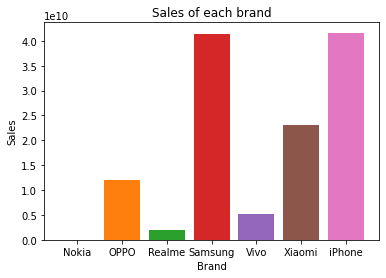

In [3]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Find the best-selling and worth-buying phones in the price range of 8 million VND, in which phone sell the most quantity

In [4]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong']]
most_brn.sort_values(by='So Luong',ascending=False,inplace=True)
most_brn




,Name,Brand,Gia,Danh gia,So Luong
52,Điện thoại OPPO A95,OPPO,6990000,4.1,260
55,Điện thoại Xiaomi Redmi Note 10S 6GB,Xiaomi,5990000,4.1,120
56,Điện thoại OPPO A76,OPPO,5990000,4.5,38
53,Điện thoại Vivo Y33s,Vivo,6490000,4.1,27


Product has most quanity is Điện thoại OPPO A95 with 260 sales


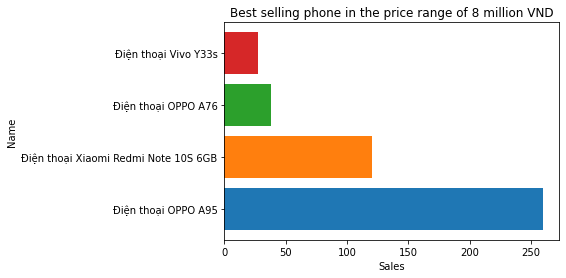

In [5]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)

for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Find all phones with Snapdragon chip, Comment that products using this chip are appreciated?

In [6]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

In [7]:



df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
snd_tmp2_avg
    




,Chip,Danh gia
0,Snapdragon 480 8 nhân 5G,3.1
1,Snapdragon 662,4.1
2,Snapdragon 680 8 nhân,4.2
3,Snapdragon 695 5G 8 nhân,3.8
4,Snapdragon 720G,3.6
5,Snapdragon 730,3.2
6,Snapdragon 732G,3.2
7,Snapdragon 765G,3.5
8,Snapdragon 778G 5G 8 nhân,3.7
9,Snapdragon 8 Gen 1 8 nhân,4.4


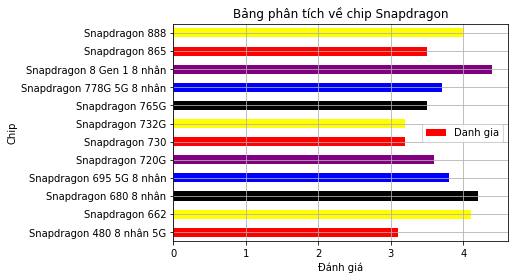

In [12]:

c = ['red', 'yellow', 'black', 'blue', 'purple']

snd_tmp2_avg.plot(x='Chip',y='Danh gia',kind='barh',color=c)
plt.title('Bảng phân tích về chip Snapdragon')
plt.xlabel('Đánh giá')
plt.grid()
plt.show()

Task: Find phones with low reviews or low sales to analyze and come up with solutions